## Data Loader

Created on SEP/11/2025  
Author: Nerveinvader  
Pipeline for loading and preprocessing Inner speech dataset  
Converting Raw into useful organized dataset  

In [2]:
import os
import numpy as np
import pandas as pd
import mne

In [10]:
# CONSTANTS

LOW_CUT: float = 0.5        # Low cut freq
HIH_CUT: float = 100.0      # High cut freq
NOTCH_FIL: float = 50.      # Notch filter freq (49.5-50.5)

SUBS_COUNT: int = 10        # Subject count
COND_COUNT: int = 3         # Conditions count (Inner, Pronoun, Rest)
CLAS_COUNT: int = 4         # Classes count (Arriba/U/31, Abajo/D, Derecha/R, Izquierda/L/34)

In [6]:
# Get the current working directory - for file managemnet
print(os.getcwd())

d:\Game Production\GithubProjects\MNE-Learning\MNE-intent-speech


In [3]:
# Data location (local)
DATA_LOCAL = "./data"
print(f"Dataset is ready: {os.path.isdir(DATA_LOCAL)}")
# List all the data inside the 'data' folder
print(f"{os.listdir(DATA_LOCAL)}\n##########")

Dataset is ready: True
['sub-01_ses-01_baseline-epo.fif', 'sub-01_ses-01_eeg-epo.fif', 'sub-01_ses-01_events.dat', 'sub-01_ses-01_exg-epo.fif', 'sub-01_ses-01_report.pkl', 'sub-01_ses-01_task-innerspeech_eeg.bdf']
##########


In [4]:
# Loading sample data
# BDF
DATA_BDF = "./data/sub-01_ses-01_task-innerspeech_eeg.bdf"
sample_raw = mne.io.read_raw_bdf(DATA_BDF, preload=True)
print(f"{sample_raw}\n##########")

Extracting EDF parameters from d:\Game Production\GithubProjects\MNE-Learning\MNE-intent-speech\data\sub-01_ses-01_task-innerspeech_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1875967  =      0.000 ...  1831.999 secs...
<RawEDF | sub-01_ses-01_task-innerspeech_eeg.bdf, 137 x 1875968 (1832.0 s), ~1.91 GiB, data loaded>
##########


In [11]:
# Func: Preprocessing (mne.io.BaseRaw)
def preprocess(raw: mne.io.BaseRaw) -> mne.io.BaseRaw:
    """
    Preprocess a raw `mne.io.BaseRaw`.bdf data:
	1. Filter signals 2. Remove band line at 50

    Returns
    -------
    mne.io.BaseRaw : processed .bdf file.
    """
    preprocess_raw: mne.io.BaseRaw = raw.copy()
    preprocess_raw.filter(l_freq=LOW_CUT, h_freq=HIH_CUT, fir_design='firwin', verbose="error")
    preprocess_raw.notch_filter(NOTCH_FIL)
    return preprocess_raw

Effective window size : 2.000 (s)
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 6759 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    5.6s finished


Effective window size : 2.000 (s)
Plotting power spectral density (dB=True).


C:\Users\aminr\AppData\Local\Temp\ipykernel_10156\1117362259.py:4: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  preprocess(sample_raw).compute_psd(fmax=120).plot()
d:\anaconda3\envs\mne_tf_env\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


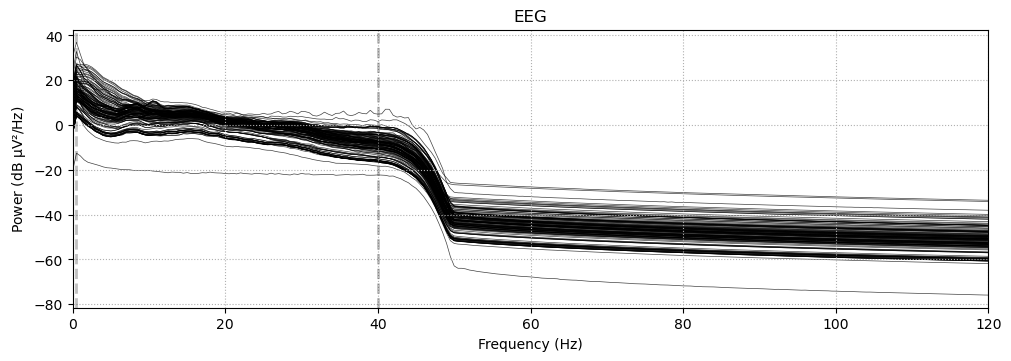

In [31]:
# Sample Visualization
# BDF
sample_raw.compute_psd(fmax=120)
preprocess(sample_raw).compute_psd(fmax=120).plot()

In [ ]:
# Reading pickle file (derivative)
DATA_PKL = "./data/sub-01_ses-01_report.pkl"
pd.read_pickle(DATA_PKL)

{'Age': 56,
 'Gender': 'F',
 'Recording_time': 1832,
 'Ans_R': 43,
 'Ans_W': 2,
 'EMG_trials': array([ 44.,  55.,  56.,  59., 148., 155.]),
 'Power_EXG7': array([1.66555993e-09, 1.78973692e-10, 3.09067948e-11, 4.65290829e-10,
        3.16289043e-09, 1.00091801e-09]),
 'Power_EXG8': array([1.40977914e-09, 3.52279347e-10, 2.23067212e-10, 5.91289131e-10,
        6.02205634e-09, 6.62926101e-10]),
 'Baseline_EXG7_mean': np.float64(2.1510271959948184e-10),
 'Baseline_EXG8_mean': np.float64(6.148708634155476e-11),
 'Baseline_EXG7_std': np.float64(1.5097728063882982e-10),
 'Baseline_EXG8_std': np.float64(4.116691114385579e-11)}

In [13]:
# Reading dat file (derivative)
DATA_EVENT = "./data/sub-01_ses-01_events.dat"
with open(DATA_EVENT, 'rb') as file:
    sample_dat = pd.read_pickle(file)
print("Events file structure:\nSample Num / Class UDRL / Condition IPR / Session 1-3")
print(f"{sample_dat}\n##########")

Events file structure:
Sample Num / Class UDRL / Condition IPR / Session 1-3
[[  39869       3       0       1]
 [  46491       0       0       1]
 [  53010       3       0       1]
 [  59649       3       0       1]
 [  66270       2       0       1]
 [  73063       1       0       1]
 [  79838       3       0       1]
 [  86528       1       0       1]
 [  93064       3       0       1]
 [  99823       1       0       1]
 [ 106461       0       0       1]
 [ 113015       0       0       1]
 [ 119824       3       0       1]
 [ 126651       2       0       1]
 [ 133289       1       0       1]
 [ 139996       0       0       1]
 [ 146669       0       0       1]
 [ 153154       3       0       1]
 [ 159691       1       0       1]
 [ 166295       3       0       1]
 [ 172815       1       0       1]
 [ 179641       2       0       1]
 [ 186109       1       0       1]
 [ 192612       0       0       1]
 [ 199080       2       0       1]
 [ 205582       2       0       1]
 [ 212169    

In [8]:
# Reading fif files (derivative)
DATA_FIF = "./data/sub-01_ses-01_eeg-epo.fif"
sample_fif = mne.read_epochs(DATA_FIF, preload=True)
print(f"{sample_fif}\n")
print(f"{sample_fif.events}")
print("\n##########")

Reading d:\Game Production\GithubProjects\MNE-Learning\MNE-intent-speech\data\sub-01_ses-01_eeg-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    4000.00 ms
        0 CTF compensation matrices available
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
<EpochsFIF | 200 events (all good), -0.5 – 4 s (baseline off), ~225.3 MiB, data loaded,
 'Arriba': 50
 'Abajo': 50
 'Derecha': 50
 'Izquierda': 50>

[[  39869       0      34]
 [  46491       0      31]
 [  53010       0      34]
 [  59649       0      34]
 [  66270       0      33]
 [  73063       0      32]
 [  79838       0      34]
 [  86528       0      32]
 [  93064       0      34]
 [  99823       0      32]
 [ 106461       0      31]
 [ 113015       0      31]
 [ 119824       0      34]
 [ 126651       0      33]
 [ 133289       0      32]
 [ 139996       0      31]
 [ 146669       0      31]
 [ 153154       0      34]
 [ 159691    

Using matplotlib as 2D backend.


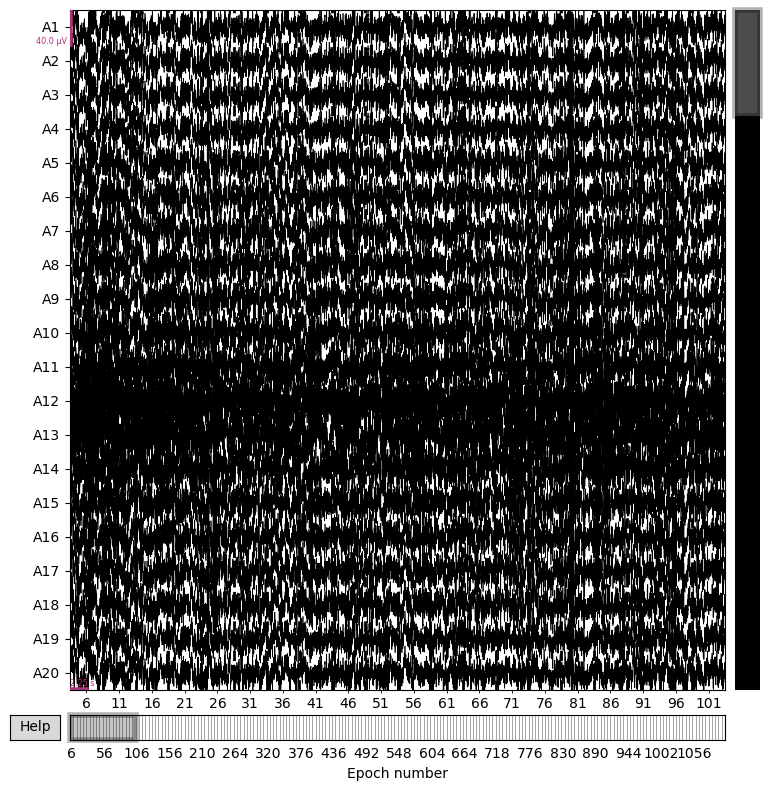

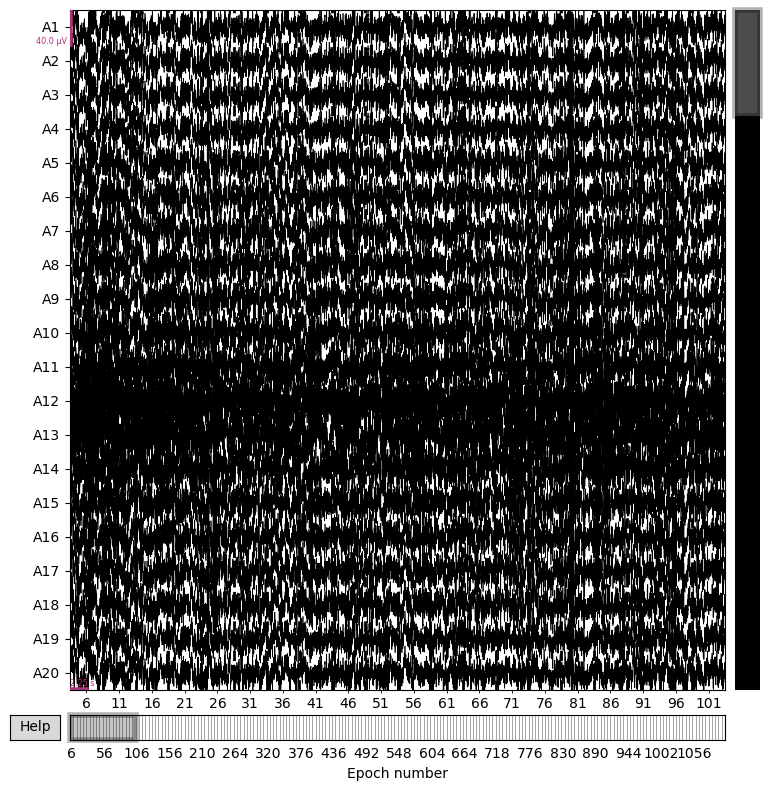

In [14]:
sample_fif.plot()

In [15]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)
ica.fit(sample_fif.copy().filter(LOW_CUT, HIH_CUT))

Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (6.605 s)



C:\Users\aminr\AppData\Local\Temp\ipykernel_21032\3549348920.py:2: RuntimeWarning: filter_length (1691) is longer than the signal (1153), distortion is likely. Reduce filter length or filter a longer signal.
  ica.fit(sample_fif.copy().filter(LOW_CUT, HIH_CUT))
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    4.2s
[

Fitting ICA to data using 128 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 16.7s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,50 iterations on epochs (230600 samples)
ICA components,20
Available PCA components,128
Channel types,eeg
ICA components marked for exclusion,—
